#### Improvement
Feature engineering: cross term and 2,3 power terms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys

In [3]:
os.chdir(r"C:\Users\hanya\Desktop\MSBD5001 Group Project\Individual Project")

In [4]:
training_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
training_label = np.log(training_data['time'])
data_corr = training_data.corr()['time']
data_corr

id                      0.050309
l1_ratio               -0.013337
alpha                  -0.009759
max_iter                0.264227
random_state            0.043778
n_jobs                 -0.114705
n_samples               0.296451
n_features              0.220124
n_classes               0.166696
n_clusters_per_class   -0.060997
n_informative           0.109154
flip_y                  0.120277
scale                   0.004990
time                    1.000000
Name: time, dtype: float64

In [5]:
col_drop = data_corr[abs(data_corr)<0.1]
col_drop.index

Index(['id', 'l1_ratio', 'alpha', 'random_state', 'n_clusters_per_class',
       'scale'],
      dtype='object')

In [6]:
all_data = pd.concat([training_data.drop(['time'],axis=1), test_data])#.drop('id',axis=1)])
all_data.drop(col_drop.index,axis=1, inplace=True)
all_data

,penalty,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y
0,none,417,-1,1089,327,4,7,0.074798
1,l1,578,1,790,373,4,7,0.077781
2,none,588,2,428,1198,2,6,0.030196
3,none,829,4,877,313,6,7,0.057261
4,elasticnet,167,2,216,644,8,11,0.073728
5,l1,986,4,1396,861,4,6,0.097483
6,none,929,2,908,691,5,6,0.095324
7,l1,422,8,677,737,9,8,0.040463
8,l1,308,8,498,1191,2,9,0.025639
9,l2,510,8,1380,803,9,10,0.024620


In [7]:
all_data.loc[all_data['n_jobs'] == -1, 'n_jobs'] = 32
all_data

,penalty,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y
0,none,417,32,1089,327,4,7,0.074798
1,l1,578,1,790,373,4,7,0.077781
2,none,588,2,428,1198,2,6,0.030196
3,none,829,4,877,313,6,7,0.057261
4,elasticnet,167,2,216,644,8,11,0.073728
5,l1,986,4,1396,861,4,6,0.097483
6,none,929,2,908,691,5,6,0.095324
7,l1,422,8,677,737,9,8,0.040463
8,l1,308,8,498,1191,2,9,0.025639
9,l2,510,8,1380,803,9,10,0.024620


In [8]:
pd.concat([all_data.iloc[:40, :], training_label], axis=1).corr()

,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,time
max_iter,1.000000,-0.308460,0.088911,-0.110793,-0.062427,0.005983,0.246672,0.509555
n_jobs,-0.308460,1.000000,0.301990,0.072098,0.281106,-0.031786,-0.165895,-0.265715
n_samples,0.088911,0.301990,1.000000,0.124807,0.249377,0.053635,0.180971,0.559025
n_features,-0.110793,0.072098,0.124807,1.000000,0.013934,-0.058481,-0.100793,0.176123
n_classes,-0.062427,0.281106,0.249377,0.013934,1.000000,0.495664,-0.058058,0.146707
n_informative,0.005983,-0.031786,0.053635,-0.058481,0.495664,1.000000,-0.193710,0.087249
flip_y,0.246672,-0.165895,0.180971,-0.100793,-0.058058,-0.193710,1.000000,0.303276
time,0.509555,-0.265715,0.559025,0.176123,0.146707,0.087249,0.303276,1.000000


In [9]:
all_data['n_samples_n_jobs'] = all_data['n_samples']/all_data['n_jobs']
all_data['max_iter_n_samples'] = all_data['max_iter']*all_data['n_samples']

In [10]:
pd.concat([all_data.iloc[:40, :], training_label], axis=1).corr()

,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,n_samples_n_jobs,max_iter_n_samples,time
max_iter,1.000000,-0.308460,0.088911,-0.110793,-0.062427,0.005983,0.246672,0.301006,0.635488,0.509555
n_jobs,-0.308460,1.000000,0.301990,0.072098,0.281106,-0.031786,-0.165895,-0.465395,-0.088153,-0.265715
n_samples,0.088911,0.301990,1.000000,0.124807,0.249377,0.053635,0.180971,0.452757,0.729087,0.559025
n_features,-0.110793,0.072098,0.124807,1.000000,0.013934,-0.058481,-0.100793,0.006496,-0.039168,0.176123
n_classes,-0.062427,0.281106,0.249377,0.013934,1.000000,0.495664,-0.058058,-0.053117,0.078236,0.146707
n_informative,0.005983,-0.031786,0.053635,-0.058481,0.495664,1.000000,-0.193710,0.080958,-0.023577,0.087249
flip_y,0.246672,-0.165895,0.180971,-0.100793,-0.058058,-0.193710,1.000000,0.355065,0.349392,0.303276
n_samples_n_jobs,0.301006,-0.465395,0.452757,0.006496,-0.053117,0.080958,0.355065,1.000000,0.542298,0.672762
max_iter_n_samples,0.635488,-0.088153,0.729087,-0.039168,0.078236,-0.023577,0.349392,0.542298,1.000000,0.717209
time,0.509555,-0.265715,0.559025,0.176123,0.146707,0.087249,0.303276,0.672762,0.717209,1.000000


In [11]:
all_data1 = all_data.copy()
all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)
all_data1 = all_data.iloc[:,1:]
all_data1

,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,n_samples_n_jobs,max_iter_n_samples
0,-0.493100,2.057731,0.622361,-1.173920,-0.765696,-1.056994,0.846046,-0.768994,0.063189
1,0.119678,-0.731254,-0.059258,-1.066618,-0.765696,-1.056994,0.944855,1.440063,0.071133
2,0.157739,-0.641287,-0.884495,0.857818,-1.567472,-1.695275,-0.631386,-0.243097,-0.578335
3,1.075003,-0.461352,0.139073,-1.206578,0.036080,-1.056994,0.265138,-0.227756,0.928023
4,-1.444618,-0.641287,-1.367783,-0.434470,0.837856,1.496131,0.810594,-0.552846,-1.261507
5,1.672556,-0.461352,1.322218,0.071715,-0.765696,-1.695275,1.597501,0.151393,2.985925
6,1.455610,-0.641287,0.209743,-0.324836,-0.364808,-1.695275,1.525981,0.458219,1.297187
7,-0.474069,-0.101483,-0.316859,-0.217534,1.238744,-0.418712,-0.291291,-0.621151,-0.470500
8,-0.907962,-0.101483,-0.724919,0.841490,-1.567472,0.219569,-0.782352,-0.686534,-0.889766
9,-0.139135,-0.101483,1.285743,-0.063579,1.238744,0.857850,-0.816084,-0.364367,0.854401


In [12]:
cols = all_data1.columns
for col1 in range(len(cols)):
    for col2 in range(col1, len(cols)):
        c1 = cols[col1]
        c2 = cols[col2]
        all_data1[str(c1)+'_'+str(c2)] = all_data1[c1] * all_data1[c2]

In [13]:
all_data1 -= all_data1.mean() 
df_pca = pd.DataFrame(np.mat(all_data1.values).T * np.mat(all_data1.values))
df_pca

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,499.000000,-28.696185,-51.253720,5.650341,1.383939,24.394587,-8.334710,0.090535,-27.411438,22.621677,...,12.266431,-8.987347,0.066125,-40.473545,-20.972535,-17.379483,46.961229,-40.625509,254.730313,-43.632427
1,-28.696185,499.000000,11.617474,4.495586,19.792006,-12.575023,-28.483419,-249.328202,-17.903619,2.016469,...,-1.833122,26.595913,20.078925,-4.503875,-13.359249,10.167723,-15.355633,-168.700075,41.659639,8.020770
2,-51.253720,11.617474,499.000000,21.577483,2.864795,-7.206984,17.778901,212.993210,-39.982261,-27.411438,...,26.927923,-10.869507,-43.714411,84.325250,5.975009,14.843720,-80.858828,359.914589,-60.890267,124.556561
3,5.650341,4.495586,21.577483,499.000000,4.577020,5.135219,5.407011,-14.735338,-7.305189,-4.716940,...,5.144346,10.930164,38.944539,-1.822366,-5.775820,40.938419,12.419082,-35.400652,39.611441,15.725354
4,1.383939,19.792006,2.864795,4.577020,499.000000,196.136522,18.109841,-28.323961,13.452727,23.420425,...,33.469062,-25.509088,-1.922643,12.192024,-9.832218,-32.742567,1.691425,-39.784189,17.951215,6.357697
5,24.394587,-12.575023,-7.206984,5.135219,196.136522,499.000000,26.699862,-12.164117,14.870466,-7.106054,...,58.347329,12.386716,-0.335862,-14.641963,-8.484328,-28.930330,35.403319,-23.262637,43.404487,-94.072034
6,-8.334710,-28.483419,17.778901,5.407011,18.109841,26.699862,499.000000,20.236558,-8.321284,1.802271,...,12.386716,-8.484328,-28.930330,35.403319,13.331319,26.281813,-20.768298,16.629815,-55.295520,35.904854
7,0.090535,-249.328202,212.993210,-14.735338,-28.323961,-12.164117,20.236558,499.000000,-6.288614,-4.748769,...,-0.335862,-28.930330,-23.262637,43.404487,26.281813,16.629815,-55.295520,921.078854,-127.549945,37.135968
8,-27.411438,-17.903619,-39.982261,-7.305189,13.452727,14.870466,-8.321284,-6.288614,520.059277,-20.459368,...,36.509250,38.140254,42.157575,-92.547700,30.382915,-53.221123,35.051861,-76.398732,36.491338,-252.731672
9,22.621677,2.016469,-27.411438,-4.716940,23.420425,-7.106054,1.802271,-4.748769,-20.459368,391.206073,...,-15.325879,25.386520,-28.123781,16.819940,0.129850,18.411736,10.667739,30.382220,1.161338,440.780747


In [14]:
from scipy.linalg import svd
u,w,v = svd(df_pca)

In [15]:
all_data.index = range(len(all_data))
new_data = pd.DataFrame(np.mat(all_data1.values)*np.mat(u[:,:]))
new_data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-1.219339,0.383232,3.490823,1.847917,0.358092,1.067429,-0.000856,0.210353,-0.529726,-1.056087,...,0.101647,-0.026635,-0.060514,-0.166553,-0.179035,-0.200989,-0.235929,0.275255,0.051019,3.558805e-15
1,0.882023,-1.792501,-1.037750,1.061864,0.223672,-1.158850,1.252292,-1.313224,-0.038237,0.465340,...,0.194950,-0.016989,-1.121825,0.120486,0.009758,0.293210,0.180414,-0.248806,0.048182,3.249865e-16
2,-1.623362,-0.459792,-0.811551,0.099127,0.142245,1.768203,1.090340,-0.009039,-1.448745,0.210290,...,0.019082,-0.234863,-0.360813,-0.274173,0.159309,0.028693,0.143261,0.226079,-0.124643,-8.114967e-15
3,-1.398609,-0.614286,-1.251157,0.352058,0.333046,-0.504724,0.277900,-0.581819,0.388295,-0.157840,...,-0.432740,-0.089322,0.244604,0.418472,0.076765,-0.433622,0.203788,0.132977,-0.145193,-2.577222e-15
4,0.646509,3.773516,-1.196810,-0.551830,-1.378867,0.757375,-1.606004,0.952499,-2.818172,1.374216,...,-0.195698,-0.182011,0.264678,0.087697,-0.002372,-0.011719,0.157858,0.078667,-0.096463,-5.373417e-15
5,0.190959,0.925941,-0.593713,-3.473809,2.597280,-2.022231,1.836504,-0.629381,-0.985617,-2.170343,...,-0.155381,-1.794922,-0.167055,0.599418,0.257214,0.027124,-0.120385,-0.282559,-0.131928,-6.688515e-15
6,-0.998413,-1.006661,-1.225755,0.324403,1.014147,-0.790795,0.948321,-0.794044,-0.628118,-0.492341,...,0.328243,0.158551,0.139678,-0.476025,0.488429,-0.208103,-0.077435,0.279959,0.027674,-1.410196e-15
7,-1.297294,-0.620102,-1.052731,0.838138,-0.276827,-0.769921,-0.645876,-0.391539,0.015599,-0.789710,...,0.298724,-0.122095,-0.270831,0.111858,-0.719117,-0.460530,-0.075259,-0.127127,0.114236,6.924024e-15
8,-0.913791,0.018417,-1.045556,0.612828,-0.918733,0.590013,-1.252045,-0.533665,-0.416971,-0.590373,...,0.400758,0.328372,0.394762,-0.335895,-0.222415,-0.050876,-0.011505,-0.067336,0.102565,2.834613e-16
9,-1.205147,-0.216134,-0.959671,0.569672,0.880541,0.505672,0.479632,0.001860,0.377094,-0.758874,...,-0.297923,0.794718,-0.407676,0.239488,-0.794529,-0.484544,0.099410,-0.318401,-0.154423,-4.030519e-16


In [16]:
# check the correlation of new features and old features & time
temp = all_data.copy()
temp.index = range(len(temp))
temp = pd.concat([temp.iloc[:40, :], training_label], axis=1)
chk = pd.concat([new_data.iloc[:40, :], temp], axis=1)

In [17]:
chk_corr = chk.corr()

In [18]:
w[:30].sum()/w.sum()

0.8740213523520477

In [19]:
all_data

,penalty,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,n_samples_n_jobs,max_iter_n_samples
0,none,-0.493100,2.057731,0.622361,-1.173920,-0.765696,-1.056994,0.846046,-0.768994,0.063189
1,l1,0.119678,-0.731254,-0.059258,-1.066618,-0.765696,-1.056994,0.944855,1.440063,0.071133
2,none,0.157739,-0.641287,-0.884495,0.857818,-1.567472,-1.695275,-0.631386,-0.243097,-0.578335
3,none,1.075003,-0.461352,0.139073,-1.206578,0.036080,-1.056994,0.265138,-0.227756,0.928023
4,elasticnet,-1.444618,-0.641287,-1.367783,-0.434470,0.837856,1.496131,0.810594,-0.552846,-1.261507
5,l1,1.672556,-0.461352,1.322218,0.071715,-0.765696,-1.695275,1.597501,0.151393,2.985925
6,none,1.455610,-0.641287,0.209743,-0.324836,-0.364808,-1.695275,1.525981,0.458219,1.297187
7,l1,-0.474069,-0.101483,-0.316859,-0.217534,1.238744,-0.418712,-0.291291,-0.621151,-0.470500
8,l1,-0.907962,-0.101483,-0.724919,0.841490,-1.567472,0.219569,-0.782352,-0.686534,-0.889766
9,l2,-0.139135,-0.101483,1.285743,-0.063579,1.238744,0.857850,-0.816084,-0.364367,0.854401


In [20]:
new_data1 = chk.drop(['penalty','time'], axis=1)
new_data1

,0,1,2,3,4,5,6,7,8,9,...,52,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,n_samples_n_jobs,max_iter_n_samples
0,-1.219339,0.383232,3.490823,1.847917,0.358092,1.067429,-0.000856,0.210353,-0.529726,-1.056087,...,3.558805e-15,-0.493100,2.057731,0.622361,-1.173920,-0.765696,-1.056994,0.846046,-0.768994,0.063189
1,0.882023,-1.792501,-1.037750,1.061864,0.223672,-1.158850,1.252292,-1.313224,-0.038237,0.465340,...,3.249865e-16,0.119678,-0.731254,-0.059258,-1.066618,-0.765696,-1.056994,0.944855,1.440063,0.071133
2,-1.623362,-0.459792,-0.811551,0.099127,0.142245,1.768203,1.090340,-0.009039,-1.448745,0.210290,...,-8.114967e-15,0.157739,-0.641287,-0.884495,0.857818,-1.567472,-1.695275,-0.631386,-0.243097,-0.578335
3,-1.398609,-0.614286,-1.251157,0.352058,0.333046,-0.504724,0.277900,-0.581819,0.388295,-0.157840,...,-2.577222e-15,1.075003,-0.461352,0.139073,-1.206578,0.036080,-1.056994,0.265138,-0.227756,0.928023
4,0.646509,3.773516,-1.196810,-0.551830,-1.378867,0.757375,-1.606004,0.952499,-2.818172,1.374216,...,-5.373417e-15,-1.444618,-0.641287,-1.367783,-0.434470,0.837856,1.496131,0.810594,-0.552846,-1.261507
5,0.190959,0.925941,-0.593713,-3.473809,2.597280,-2.022231,1.836504,-0.629381,-0.985617,-2.170343,...,-6.688515e-15,1.672556,-0.461352,1.322218,0.071715,-0.765696,-1.695275,1.597501,0.151393,2.985925
6,-0.998413,-1.006661,-1.225755,0.324403,1.014147,-0.790795,0.948321,-0.794044,-0.628118,-0.492341,...,-1.410196e-15,1.455610,-0.641287,0.209743,-0.324836,-0.364808,-1.695275,1.525981,0.458219,1.297187
7,-1.297294,-0.620102,-1.052731,0.838138,-0.276827,-0.769921,-0.645876,-0.391539,0.015599,-0.789710,...,6.924024e-15,-0.474069,-0.101483,-0.316859,-0.217534,1.238744,-0.418712,-0.291291,-0.621151,-0.470500
8,-0.913791,0.018417,-1.045556,0.612828,-0.918733,0.590013,-1.252045,-0.533665,-0.416971,-0.590373,...,2.834613e-16,-0.907962,-0.101483,-0.724919,0.841490,-1.567472,0.219569,-0.782352,-0.686534,-0.889766
9,-1.205147,-0.216134,-0.959671,0.569672,0.880541,0.505672,0.479632,0.001860,0.377094,-0.758874,...,-4.030519e-16,-0.139135,-0.101483,1.285743,-0.063579,1.238744,0.857850,-0.816084,-0.364367,0.854401


In [21]:
col_get = ((chk_corr['time'])>0.2).drop('time')
col_get.index

Index([                   0,                    1,                    2,
                          3,                    4,                    5,
                          6,                    7,                    8,
                          9,                   10,                   11,
                         12,                   13,                   14,
                         15,                   16,                   17,
                         18,                   19,                   20,
                         21,                   22,                   23,
                         24,                   25,                   26,
                         27,                   28,                   29,
                         30,                   31,                   32,
                         33,                   34,                   35,
                         36,                   37,                   38,
                         39,                   40, 

In [22]:
all_data3 = pd.concat([new_data, all_data.drop('penalty', axis=1)], axis=1).loc[:, col_get]
all_data3 = pd.concat([all_data['penalty'], all_data3], axis=1)
all_data3 = pd.get_dummies(all_data3)
all_data3

,4,6,8,27,33,34,36,42,43,max_iter,n_samples,flip_y,n_samples_n_jobs,max_iter_n_samples,penalty_elasticnet,penalty_l1,penalty_l2,penalty_none
0,0.358092,-0.000856,-0.529726,-0.220920,-0.131843,0.309996,-0.576094,-0.757349,0.101647,-0.493100,0.622361,0.846046,-0.768994,0.063189,0,0,0,1
1,0.223672,1.252292,-0.038237,-0.334605,0.583741,-0.377906,-0.940537,-0.421930,0.194950,0.119678,-0.059258,0.944855,1.440063,0.071133,0,1,0,0
2,0.142245,1.090340,-1.448745,0.743549,-0.108202,-0.044352,0.083217,-0.277045,0.019082,0.157739,-0.884495,-0.631386,-0.243097,-0.578335,0,0,0,1
3,0.333046,0.277900,0.388295,-0.046936,1.567808,-0.530135,-0.688119,0.975979,-0.432740,1.075003,0.139073,0.265138,-0.227756,0.928023,0,0,0,1
4,-1.378867,-1.606004,-2.818172,-1.365603,0.596563,-0.813132,0.098582,-0.207098,-0.195698,-1.444618,-1.367783,0.810594,-0.552846,-1.261507,1,0,0,0
5,2.597280,1.836504,-0.985617,-0.002570,0.971649,2.533560,0.518285,0.731741,-0.155381,1.672556,1.322218,1.597501,0.151393,2.985925,0,1,0,0
6,1.014147,0.948321,-0.628118,-0.020776,2.020046,0.405417,0.133164,0.937638,0.328243,1.455610,0.209743,1.525981,0.458219,1.297187,0,0,0,1
7,-0.276827,-0.645876,0.015599,0.714106,-0.065525,-0.156719,-1.022245,0.248203,0.298724,-0.474069,-0.316859,-0.291291,-0.621151,-0.470500,0,1,0,0
8,-0.918733,-1.252045,-0.416971,0.793922,0.043159,-0.635619,1.932496,-0.090339,0.400758,-0.907962,-0.724919,-0.782352,-0.686534,-0.889766,0,1,0,0
9,0.880541,0.479632,0.377094,0.219605,-0.238062,-0.168117,-0.107188,-0.156430,-0.297923,-0.139135,1.285743,-0.816084,-0.364367,0.854401,0,0,1,0


In [23]:
new_data = all_data3
training_len = 40 #len(training_df_data)-test_training
test_training = len(training_data) - training_len
test_len = len(test_data)

X_train = new_data.iloc[:training_len, :] # training data--cross validation
X_train_test =  new_data.iloc[training_len:training_len+test_training, :] # training data--test
y_train = training_label.iloc[:training_len] # training labels--cross validation
y_train_test = training_label.iloc[-test_training:] # training label--test
x_test = new_data.iloc[-test_len:, :] # test data

#### Ridge

In [24]:
from sklearn.metrics import mean_squared_error, roc_auc_score, log_loss
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [25]:
from sklearn.linear_model import Ridge

In [26]:
params = np.linspace(0.1,10,num=100)
test_scores = []
for param in tqdm(params):
    clf1 = Ridge(alpha=param)
    test_score = cross_val_score(clf1, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.23it/s]


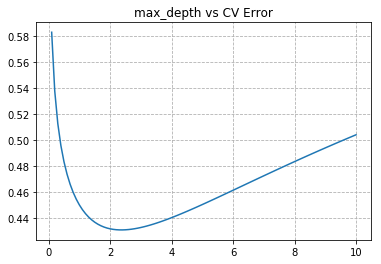

In [27]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [28]:
clf1_test = Ridge(alpha=2)
clf1_test.fit(X_train, y_train) 

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
clf1_test.coef_

array([-0.03994977,  0.05832046,  0.02417816,  0.27045416,  0.11890105,
        0.01311297,  0.21065543,  0.12574484, -0.03101245,  0.07261415,
        0.23025104, -0.04250901,  0.64384339,  0.28326076,  0.45347996,
        0.32659991, -0.3427352 , -0.43734467])

In [30]:
clf1_test.coef_

array([-0.03994977,  0.05832046,  0.02417816,  0.27045416,  0.11890105,
        0.01311297,  0.21065543,  0.12574484, -0.03101245,  0.07261415,
        0.23025104, -0.04250901,  0.64384339,  0.28326076,  0.45347996,
        0.32659991, -0.3427352 , -0.43734467])

In [31]:
rst = np.exp(clf1_test.predict(x_test))
rst

array([  2.61405693,   2.44688094,   0.51038488,   1.32741504,
         2.3281544 ,   1.63717661,   0.24383992,   0.50386463,
         2.1096893 ,  13.88691414,  12.3378849 ,  13.01855575,
         0.98894873,  49.28192255,   0.55864978,   0.48494602,
         0.69027   ,   4.30080861,   1.34767044,   1.28166238,
         0.3734452 ,   0.49068628,   0.72076325,   0.99374744,
         1.1700828 ,   1.30716078,   1.78521112,   2.3984056 ,
         4.92362448,   1.88682315,   3.13210707,   1.35124694,
         1.09284734,   2.99430827,   2.38396162,   1.03263493,
         0.89228356,   1.23935963,   4.65293993,   1.33843737,
         2.73416395,   3.00877651,   1.1106732 ,   3.00539373,
         0.85995304,   3.03160368,   0.68873941,   0.50158566,
         6.50080141,   0.81627191,   0.62662255,   4.11116237,
         0.25751387,   1.68971537,  65.79758044,   1.03128539,
         2.21430797,   1.31032871,   0.83375779,   1.01299061,
         5.04313572,   3.26558442,   1.11172656,   0.79

In [86]:
rt = pd.concat([pd.Series(range(len(rst))), pd.Series(rst)], axis=1)

In [87]:
training_label.median()

1.4050720930099487

In [88]:
rt.columns = ['id', 'time']
rt[rt<0]=1.40507

In [89]:
rt.to_csv("./submissionv3_polyfeature_median_newdata.csv")

#### Lasso

In [74]:
from sklearn.linear_model import Lasso

In [75]:
params = np.linspace(0.1,10,num=100)
test_scores = []
for param in tqdm(params):
    clf2 = Lasso(alpha=param)
    test_score = cross_val_score(clf2, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.65it/s]


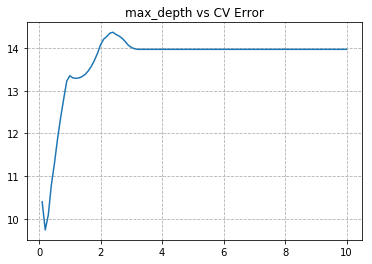

In [76]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [77]:
clf2_test = Lasso(alpha=1)
clf2_test.fit(X_train, y_train) 

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
y_train_test_pre = clf1_test.predict(X_train_test)
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 22.07


In [79]:
clf2_test.coef_

array([ 0.        ,  0.04937901,  0.5493649 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.44072107,  0.        ,  0.        ,
       -0.        , -0.        ])

In [80]:
clf2_test.predict(x_test)

array([ 3.69492508,  2.54746126,  1.03852941,  4.86901121,  2.83369621,
        2.52119001,  1.72021213,  1.18564556,  2.23022267,  0.84753527,
        5.51203973,  8.1947579 ,  4.90081621,  8.49715249,  4.69668648,
        1.44384936, -0.0520046 ,  4.98930601,  1.78548829,  2.7082965 ,
        1.57540447,  3.91951312,  2.73948424,  2.88023962,  1.97718472,
        5.1523997 ,  1.41210033,  2.27153051,  1.35260329,  2.99045566,
        1.46045104,  5.22256686,  1.63096362,  1.48898205,  3.11903173,
        1.09628234,  0.94456604,  3.28948044,  3.1093989 ,  4.16329805,
        2.6938061 ,  1.53640005,  1.99394318,  8.2538126 ,  2.3357754 ,
        0.76029621,  0.96161044,  1.1448759 ,  6.31784368,  1.84556042,
        1.80355231,  5.38924838,  1.54053143,  1.13610995,  4.33723933,
        1.71164505,  2.37043545,  3.15260893,  3.47079625, -0.11371575,
        1.50126149,  1.98308333,  3.90169634,  3.32981378,  3.52936645,
        5.33631497,  0.70886364,  4.45672941,  4.2236292 ,  1.74